In [171]:
import pandas as pd

# зададим цветовую гамму графиков в виде константы, для удобства 
colormap_def = 'jet'

# прочитаем данные 
churn_data_original = pd.read_csv('data/churn.csv')
# удалим RowNumber - не нужен
churn_data = churn_data_original.drop(labels='RowNumber', axis=1)

# изменим тип у колонок на 1 байт - возможнные знаячения 0/1 
churn_data['HasCrCard'] = churn_data['HasCrCard'].astype('int8')
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].astype('int8')
churn_data['Exited'] = churn_data['Exited'].astype('int8')

# создадим колонку 'ExitedTitle' для более читаемых графиков
churn_data['ExitedTitle'] = churn_data['Exited'].apply(lambda x: 'Ушедший' if x == 1 else 'Лояльный').astype('category')

# страны (Geography) и пол (Gender) сделаем категориями
# c gender все просто - опций не много
churn_data['Gender'] = churn_data['Gender'].astype('category')

# а для geography проверим, что значений меньше 100 и преобразуем
churn_data['Geography'] = churn_data['Geography'].astype('category')

display(churn_data.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ExitedTitle
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Ушедший
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Лояльный
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Ушедший
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Лояльный
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Лояльный


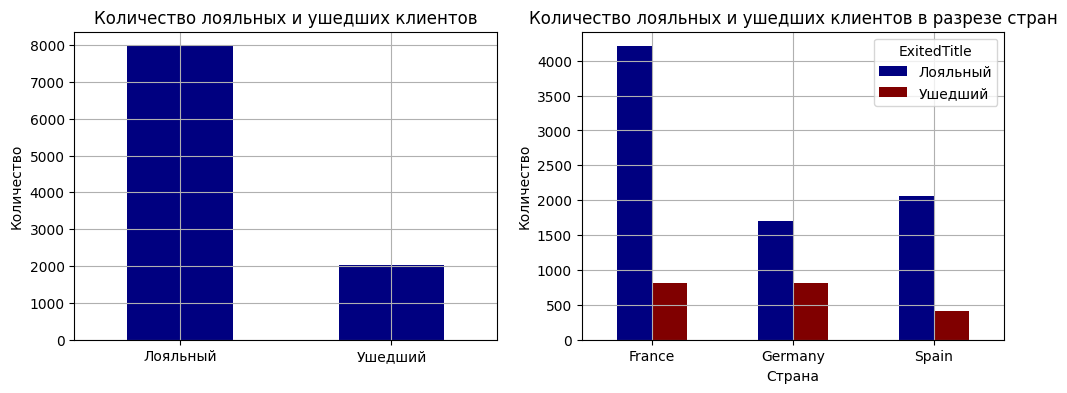

In [172]:
# 9.1 Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

import numpy as np
import matplotlib.pyplot as plt

bar_data_total = churn_data['ExitedTitle'].value_counts()
bar_data_by_geo = pd.pivot_table(data=churn_data, values="CustomerId", columns="ExitedTitle", index="Geography", aggfunc='count', observed=True)

# создадим 2 ячейки 
# - для общего количества лояльных и ушедших клиентов
# - в разрезе стран
figure, (ax1, ax2) = plt.subplots(ncols=2)

bar_data_total.plot(
    ax=ax1,
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap=colormap_def,
    title="Количество лояльных и ушедших клиентов",
    xlabel='',
    ylabel='Количество'
)
ax1.tick_params(axis='x', labelrotation=0)

bar_data_by_geo.plot(
    ax=ax2,
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap=colormap_def,
    title="Количество лояльных и ушедших клиентов в разрезе стран",
    xlabel='Страна',
    ylabel='Количество'
)
ax2.tick_params(axis='x', labelrotation=0)

Вывод: 
- Банк теряет примерно 20% своих клиентов. 
- Наихудшая ситуация в Germany - примерно каждый второй клиент уходит, а наилучшая - в France.



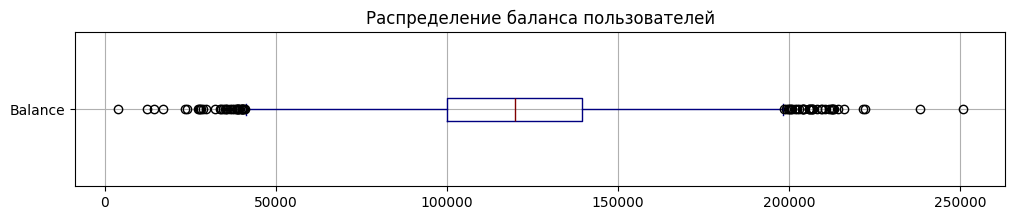

In [173]:
# 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

# отфильтруем исходную таблицу по Balance > 2500
df = churn_data[churn_data['Balance'] > 2500]
df.plot(
    kind='box',
    column='Balance',
    colormap=colormap_def,
    vert=False,
    grid=True,
    figsize=(12, 2),
    title='Распределение баланса пользователей'
);

Выводы (для клиентов с балансом выше 2500):
- Средний и медианный балансы совпадают и равны примерно 120 тыс.
- 50% всех клиентов банка имеют баланс от 100 до ~140 тыс. 
- Большое количество выбросов может говорит о том, что баланс на депозитный и кредитных счетах суммируется

/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_80092/773522292.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



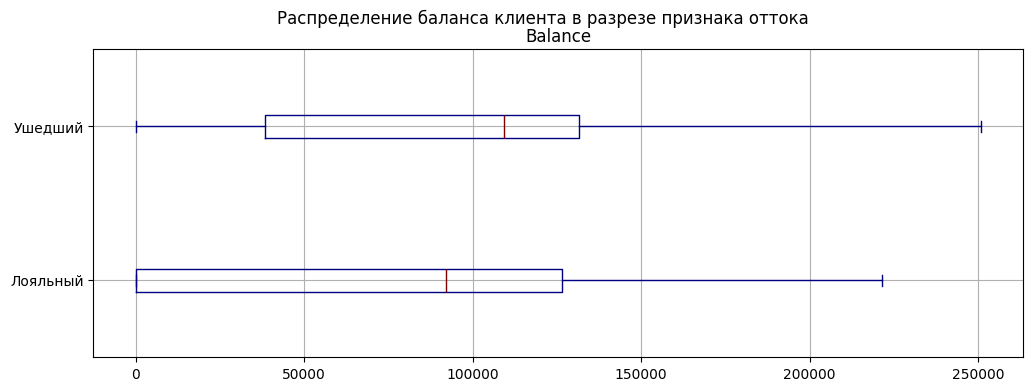

In [174]:
# Посмотрите на распределение баланса клиента в разрезе признака оттока. 
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

churn_data.plot(
    kind='box',
    column='Balance',
    by="ExitedTitle",
    colormap=colormap_def,
    vert=False,
    grid=True,
    figsize=(12, 4),
    title='Распределение баланса клиента в разрезе признака оттока',
);

Вывод: 
- Уходят более богатые клиенты - средний баланс на момент закрытия счета ~110 тыс. 

Причины:
- в банке отсутствует привилегированное обслуживание - единое окно для всех клиентов
- % ставки по депозитам не зависят от баланса и одинаковы для 100 и 100 тыc. долларов на счете

/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_80092/851214631.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



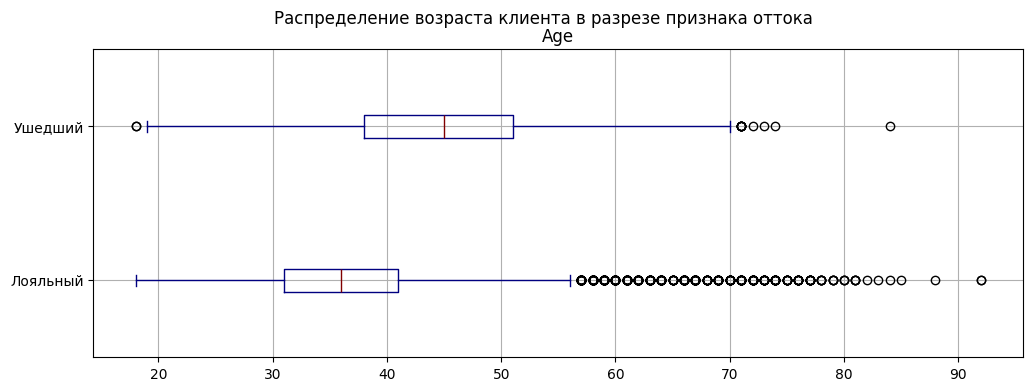

In [175]:
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока. 
# В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?
    
churn_data.plot(
    kind='box',
    column='Age',
    colormap=colormap_def,
    by="ExitedTitle",
    vert=False,
    grid=True,
    figsize=(12, 4),
    title='Распределение возраста клиента в разрезе признака оттока',
);

Выводы:
- мы видим, что уходят люди более старшего возраста - средний и медианный возраст ~45 лет. так же видно не значительное количество выбросов
- лояльные банку клиенты - это более молодое поколение (~36 лет). Большое количество выбросов может говорить, например, о том, что банк продолжает считать лояльными умерших клиентов (ибо они не закрыли счет лично). Вместо этого, таких клиентов следовало бы исключить из анализа совсем.

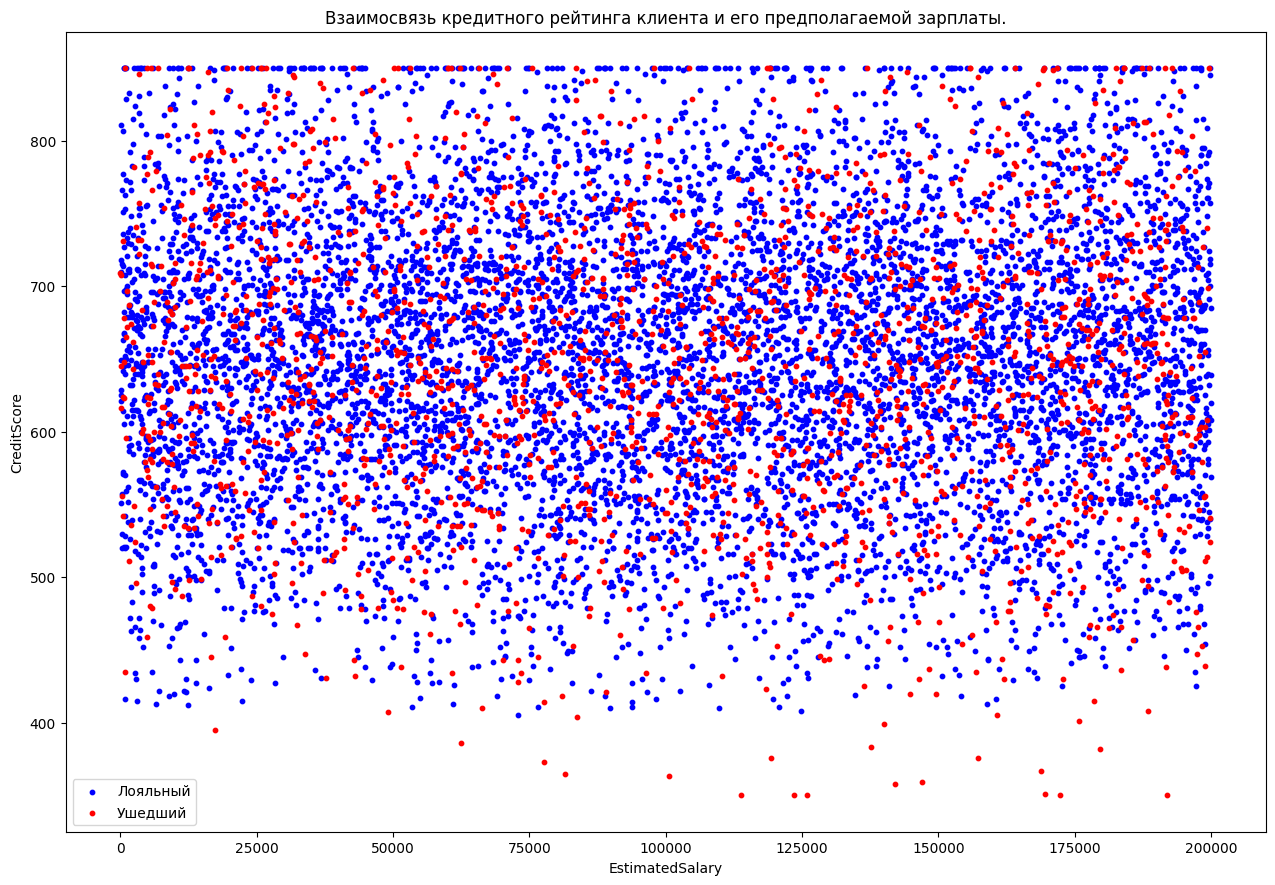

In [176]:
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. 
# Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

colors = ['blue', 'red']

fig = plt.figure(figsize=(12, 8))
axes = fig.add_axes([0, 0, 1, 1])
for index, mark_color in enumerate(colors):
    df = churn_data[churn_data['Exited'] == index]
    axes.scatter(
        data=df,
        x='EstimatedSalary', 
        y='CreditScore', 
        s=10,
        marker='o',
        color=mark_color,
        label=df['ExitedTitle'].iloc[0] # все одинаковые
    )
axes.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.')
axes.set_xlabel('EstimatedSalary')
axes.set_ylabel('CreditScore')
axes.legend();

Вывод: 
- Зависимость признака лояльности клиента от его кредитного рейтинга и предполагаемой зарплаты не прослеживается на графике выше


/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_80092/2504218063.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



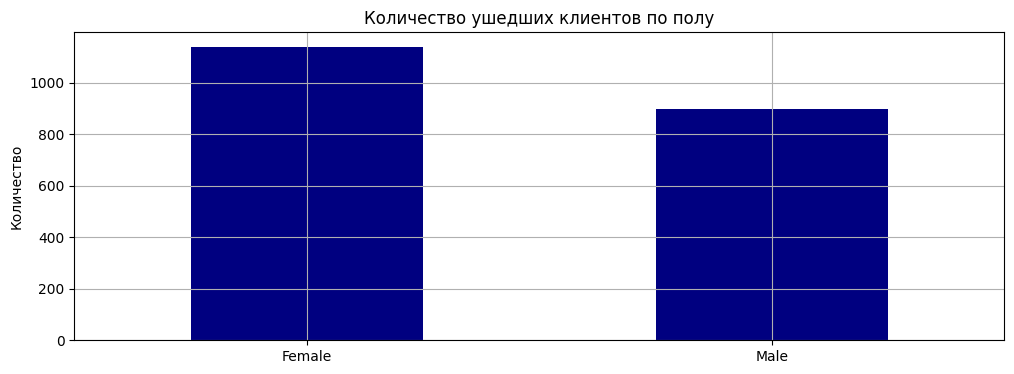

In [177]:
# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

df_by_gender = churn_data.groupby(by='Gender')['Exited'].sum()

axes = df_by_gender.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap=colormap_def,
    title="Количество ушедших клиентов по полу",
    xlabel='',
    ylabel='Количество'
)
axes.tick_params(axis='x', labelrotation=0);

Вывод: 
- Женщины уходят чаще, но разница не существенная.

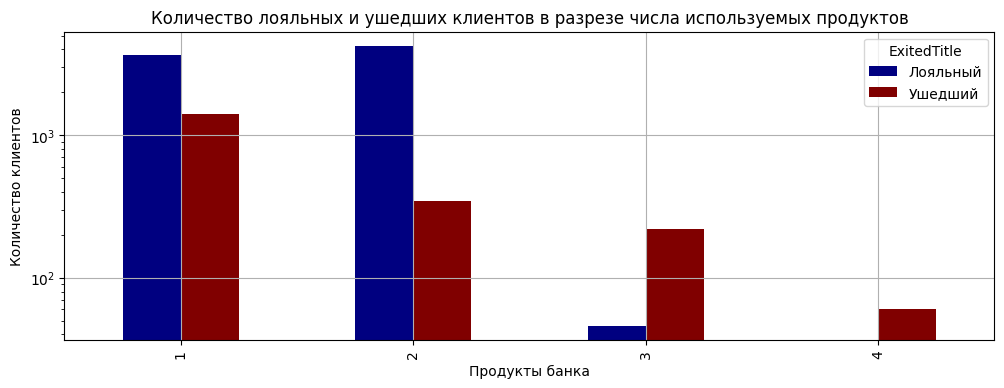

In [178]:
#  Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму

# составим сводную таблицу 
df_by_products = pd.pivot_table(data=churn_data, values="CustomerId", columns="ExitedTitle", index="NumOfProducts", aggfunc='count', observed=True)

# график построим с логарифмической шкалой по количеству клиентов - чтоб увидеть значения лояльных для 3 и 4 продуктов
df_by_products.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap=colormap_def,
    logy=True,
    title="Количество лояльных и ушедших клиентов в разрезе числа используемых продуктов",
    xlabel='Продукты банка',
    ylabel='Количество клиентов'
)
ax2.tick_params(axis='x', labelrotation=0)

Можно заметить, что реже всего уходят клиенты, использующие 2(два) продукта банка. При этом те, кто подключает 3 или 4 продукта почти всегда уходят из банка. 

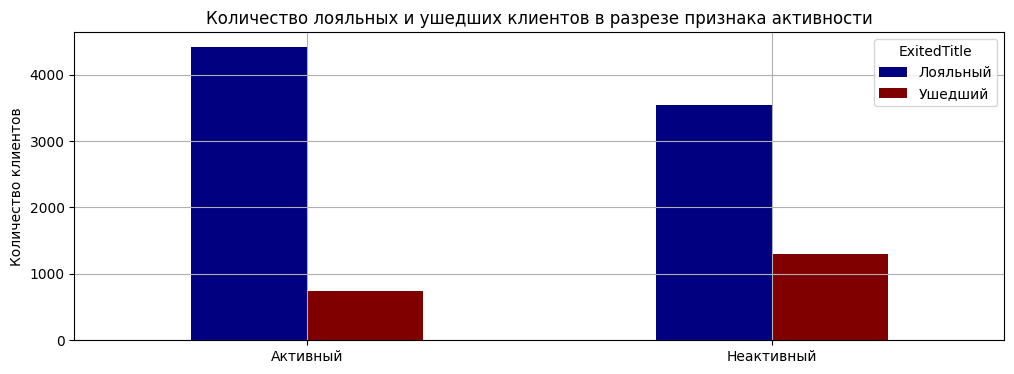

In [179]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? 
# Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

df = churn_data.copy()
# добавим колонку 'IsActiveMemberTitle' для более удобного отображения
df['IsActiveMemberTitle'] = df['IsActiveMember'].apply(lambda x: 'Активный' if x == 1 else 'Неактивный').astype('category')
pivot_active_vs_exited = pd.pivot_table(data=df, values="CustomerId", columns="ExitedTitle", index="IsActiveMemberTitle", aggfunc='count', observed=True)

ax = pivot_active_vs_exited.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap=colormap_def,
    title="Количество лояльных и ушедших клиентов в разрезе признака активности",
    xlabel='',
    ylabel='Количество клиентов')
ax.tick_params(axis='x', labelrotation=0);

Вывод:
- Активные клиенты уходят из банка примерно в 2 раза реже, чем неактивные. 

Совет:
- Следить за поведением клиента и при обнаружении признаков снижения активности делать "чтото", чтоб он снова использовал банковские услуги по максимуму

In [180]:
# 9.9. В какой стране доля ушедших клиентов больше? 
# Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано. 

import plotly
import plotly.express as px

# сгруппируем данные по GEO-локации и посчитаем долю ушедших 
df_by_country = churn_data.groupby(by='Geography', as_index=False)['Exited'].mean()

#строим график
px.choropleth(
    data_frame=df_by_country,
    locations="Geography", 
    locationmode = "country names", 
    color="Exited", 
    range_color=[0, 1], 
    title='Доля ушедших клиентов по странам', 
    width=800,
    height=500, 
    color_continuous_scale=colormap_def 
).show();

/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_80092/3381017778.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_80092/3381017778.py:11: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



Вывод:
- Доля ушедших клинтов банка, живущих в Germany, наибольшая

Возможные причины:
- Мало офисов банка в локации, неудобный график работы офисов
- Продукты плохо адаптированы для особенностей рынка Germany


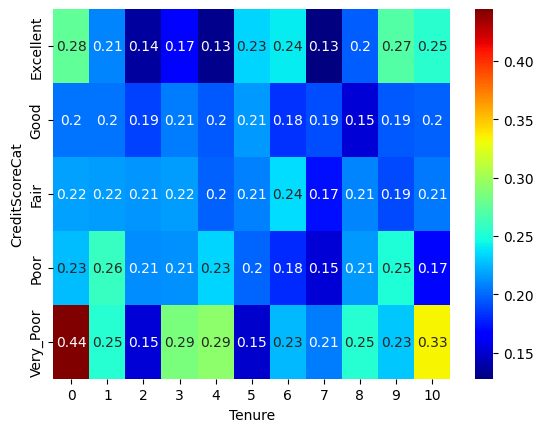

In [187]:
# 9.10.
import seaborn as sns

def get_credit_score_cat(credit_score: int):
    '''
        Переводит числовой признак CreditScore в категориальный. 
    '''
    if credit_score < 300:
         return "Deep"
    elif credit_score < 500:
        return "Very_Poor"
    elif credit_score < 601:
        return "Poor"
    elif credit_score < 661:
        return "Fair"
    elif credit_score < 781:
        return "Good"
    elif credit_score < 851:
        return "Excellent"
    else:
        return "Top"
   
   
# Переведем числовой признак CreditScore в категориальный с помощью функции get_credit_score_cat
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat).astype('category')

# Строим сводную таблицу
pivot_CreditScore_Tenure = pd.pivot_table(data=churn_data, values="Exited", index="CreditScoreCat", columns="Tenure", aggfunc='mean', observed=True)

# отсортируем по CreditScoreCat, но в соответствии с диапазоном кредитного рейтинга.
pivot_CreditScore_Tenure.index = pd.CategoricalIndex(pivot_CreditScore_Tenure.index, categories=["Deep", "Very_Poor", "Poor", "Fair", "Good", "Excellent", "Top"])
pivot_CreditScore_Tenure.sort_index(level=0, ascending=False, inplace=True)

# На основе полученной сводной таблицы (pivot_CreditScore_Tenure) строим тепловую карту
sns.heatmap(
    pivot_CreditScore_Tenure, 
    annot=True, 
    cmap=colormap_def
)
plt.show();

Наиболее часто уходят клиенты с "Very_Poor" кредитным рейтонгом. Особенно заметны 0 и 10 лет сотрудничества с банком. Причина может быть в 
- отказе в выдаче кредита - для клиентов с 0 лет (левый нижний угол)
- погашении кредита/списании - для клиентов с 10 лет (правый нижний угол)

